# Предобработка данных

In [6]:
import pandas as pd
import numpy as np

In [14]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 51.5MB/s]
100% 15.3M/15.3M [00:00<00:00, 99.6MB/s]


In [15]:
!unzip digit-recognizer

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [16]:
import os
for dirname, _, filenames in os.walk('./digit-recognizer/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
file = pd.read_csv('./digit-recognizer/train.csv')
file.head()

./digit-recognizer/train.csv
./digit-recognizer/test.csv


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def dataPrep(filepath):
  file = pd.read_csv(filepath)
  imageDataset = []

  if 'train' in filepath:
    labelDataset = file['label'].tolist()
  else:
    labelDataset = []

  for i in range(len(file)):        
    start = 1
    if 'test' in filepath:
      start = 0
    image = np.array(file.iloc[i])[start:].reshape(28,28)/255
    imageDataset.append(image)
     
  imageDataset = np.array(imageDataset)
  labelDataset = np.array(labelDataset)
  # imageDataset = np.expand_dims(imageDataset, -1)
  # labelDataset = np.expand_dims(labelDataset, -1)
  print('Images shape and amount: ', type(imageDataset), imageDataset.shape)
  print('Labels shape and amount: ', type(labelDataset), labelDataset.shape)
  return imageDataset, labelDataset


In [18]:
trainImages, trainLabels = dataPrep('./digit-recognizer/train.csv')

Images shape and amount:  <class 'numpy.ndarray'> (42000, 28, 28)
Labels shape and amount:  <class 'numpy.ndarray'> (42000,)


In [19]:
testImages, testLabels = dataPrep('./digit-recognizer/test.csv')

Images shape and amount:  <class 'numpy.ndarray'> (28000, 28, 28)
Labels shape and amount:  <class 'numpy.ndarray'> (0,)


# Визуализация

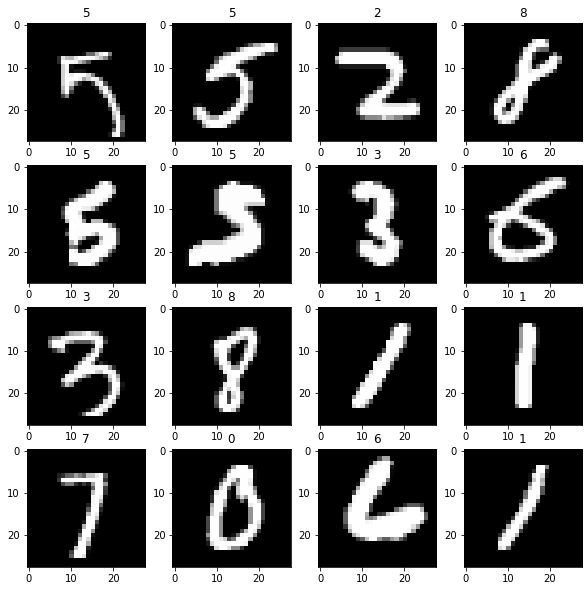

In [20]:
import matplotlib.pyplot as plt
import random

# random.seed(42)
# random.shuffle(trainImages)

fig = plt.figure(figsize=(10, 10))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    rdNumber = random.randint(0,42000)
    plt.title(trainLabels[rdNumber])
    plt.imshow(trainImages[rdNumber], cmap='Greys_r')

# Построение модели (Tensorflow)

In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(64, 3, activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       147584    
                                                      

In [22]:
device_name = tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
  

In [23]:
device_name = tf.test.gpu_device_name()
with tf.device('/device:GPU:0'):
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
history = model.fit(x=trainImages, y=trainLabels, epochs=100, shuffle=True, validation_split=0.25)

Epoch 1/100
985/985 [==============================] - 20s 8ms/step - loss: 0.2202 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.0776 - val_sparse_categorical_accuracy: 0.9772
Epoch 2/100
985/985 [==============================] - 7s 8ms/step - loss: 0.0602 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0380 - val_sparse_categorical_accuracy: 0.9883
Epoch 3/100
985/985 [==============================] - 9s 9ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0508 - val_sparse_categorical_accuracy: 0.9855
Epoch 4/100
985/985 [==============================] - 8s 8ms/step - loss: 0.0349 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0390 - val_sparse_categorical_accuracy: 0.9893
Epoch 5/100
985/985 [==============================] - 8s 8ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.0475 - val_sparse_categorical_accuracy: 0.9893
Epoch 6/100
985/985 [==============================] - 8s 8ms/step - loss: 0.0266 - sparse_cat

In [24]:
predictions = model.predict(testImages, verbose=2)
print(predictions)

875/875 - 2s - 2s/epoch - 2ms/step
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.9944683e-22 6.6364208e-18 5.5420610e-33 ... 1.4700043e-15
  9.5349488e-13 1.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.4265761e-09 4.7722526e-08 6.6931042e-18 ... 7.9918624e-07
  4.7285534e-06 9.9999440e-01]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [25]:
predictionsLabel = np.argmax(predictions, axis=1)
print(type(predictionsLabel), len(predictionsLabel), predictionsLabel.shape, predictionsLabel)

<class 'numpy.ndarray'> 28000 (28000,) [2 0 9 ... 3 9 2]


In [26]:
df = pd.DataFrame({'ImageId': [i for i in range(1,len(predictionsLabel)+1)], 'Label': predictionsLabel})
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [27]:
df.to_csv('./digit-recognizer/predictions.csv', index=False)